## Keras 기본 (모델과 층 설정 중심)

---
- `tf.keras`: 머신러닝 모델을 만들고 훈련하기 위한 고수준 API로서 텐서플로의 특수 기능을 모두 지원
  1. 사용자 친화적
  2. 모듈화 및 구성 가능성
  3. 쉬운 확장
    - 아래의 layer, unit 등 층 추가

In [2]:
!pip install -q pyyaml

### 1. tf.keras import

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras

### 2. tf.keras.Sequential model 만들기

In [5]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
# 64개의 유닛을 가진 완전 연결 층을 모델에 추가합니다:
model.add(layers.Dense(64, activation='relu'))
# 또 하나를 추가합니다:
model.add(layers.Dense(64, activation='relu'))
# 10개의 출력 유닛을 가진 소프트맥스 층을 추가합니다:
model.add(layers.Dense(10, activation='softmax'))

- `tf.keras.Sequential`: 층(layer)을 차례로 쌓아나감

<b> 층(layer) 설정</b>

In [6]:
# 시그모이드 활성화 층을 만듭니다:
layers.Dense(64, activation='sigmoid')
# 또는 다음도 가능합니다:
layers.Dense(64, activation=tf.keras.activations.sigmoid)

# 커널 행렬에 L1 규제가 적용된 선형 활성화 층. 하이퍼파라미터 0.01은 규제의 양을 조절합니다:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# 절편 벡터에 L2 규제가 적용된 선형 활성화 층. 하이퍼파라미터 0.01은 규제의 양을 조절합니다:
layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01))

# 커널을 랜덤한 직교 행렬로 초기화한 선형 활성화 층:
layers.Dense(64, kernel_initializer='orthogonal')

# 절편 벡터를 상수 2.0으로 설정한 선형 활성화 층:
layers.Dense(64, bias_initializer=tf.keras.initializers.Constant(2.0))

`tf.keras.layers` 아래의 클래스들은 일부 생성자 매개변수를 공통으로 가짐

- <b>`activation`</b>: 층의 활성화 함수를 설정합니다. 이 매개변수에는 기본으로 제공되는 함수의 이름을 쓰거나 호출 가능한 객체를 지정할 수 있습니다. 기본값은 활성화 함수를 적용하지 않는 것입니다.
- <b>`kernel_initializer`</b>와 <b>`bias_initializer`</b>: 층의 가중치(weight)(커널(kernel)과 절편(bias))를 초기화하는 방법입니다. 내장 함수나 호출 가능한 객체를 지정합니다. 기본값은 `"glorot_uniform"` 초기화입니다.
- <b>`kernel_regularizer`</b>와 <b>`bias_regularizer`</b>: L1 또는 L2 규제(regularization)와 같이 층의 가중치(커널과 절편)에 적용할 규제 방법을 지정합니다. 기본값은 규제를 적용하지 않는 것입니다.

---

# Keras를 사용한 ML 기본사항
## 1. 기본 이미지 분류

#### 운동화나 셔츠와 같은 옷 이미지를 분류하는 신경망 모델

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


- `matplotlib` 에러가 뜰 경우: virtualvenv 설치된 경로에 아래의 명령어 입력
  - `> pip3 install matplotlib`

---

### 패션 MNIST 데이터셋 임포트
- 네트워크를 훈련하는데 60,000개의 이미지 사용
- 10,000개의 이미지로 평가


- `load_data()` 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환
  - `train_images`와 `train_labels` 배열은 모델 학습에 사용되는 훈련 세트.
  - `test_images`와 `test_labels` 배열은 모델 테스트에 사용되는 테스트 세트.



이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:

|레이블|클래스|
|---|---|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

각 이미지는 하나의 레이블에 매핑되어 있음




In [10]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

### 데이터 전처리

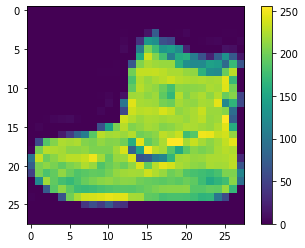

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

이미지 픽셀 값의 범위(`0 ~ 255`)를 `0 ~ 1` 사이의 값으로 조정

처음 25개의 이미지와 그 아래 클래스 이름 출력

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

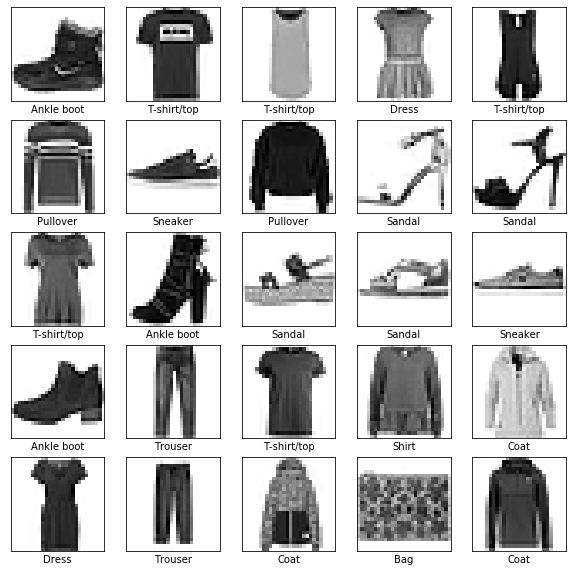

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성
- 모델의 층을 구성한 다음 모델을 컴파일 함

#### 층 설정
- 주입된 데이터에서 표현(feature)을 추출
- `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됨

1. 아래 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환

2. 픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결되며 이 층을 <u>밀집 연결(densely-connected)</u> 또는 <u>완전 연결(fully-connected)</u> 층이라고 부름.

3. 첫 번째 Dense 층은 <u>128개의 뉴런</u>을 가지고, 두 번째(마지막) 층은 10개의 노드의 소프트맥스(softmax) 층으로 이 층은 <u>10개의 확률을 반환</u>하고 반환된 값의 전체 합은 1임. 각 노드는 현재 이미지가 <u>10개 클래스 중 하나에 속할 확률</u>을 출력.

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### 모델 컴파일
- 모델을 훈련하기 전에 필요한 몇 가지 설정
  - 손실함수(Loss function): 훈련하는 동안 모델의 오차 측정, 최소화 해야함
  - Optimizer: 데이터와 손실함수를 바탕으로 모델의 업데이트 방법 결정
  - Metrics: 훈련 단계와 테스트 단계를 모니터링하기 위해 사용. 아래 예시에서 <i>정확도</i> 사용

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련
1. 훈련 데이터를 모델에 주입(`train_images`, `train_labels` 배열)
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦. 

`model.fit` 메서드를 호출하여 훈련 데이터를 학습

In [25]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 1.0964 - accuracy: 0.6588
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.6474 - accuracy: 0.7655
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5735 - accuracy: 0.7935
Epoch 4/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5310 - accuracy: 0.8113
Epoch 5/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5026 - accuracy: 0.8230


### 정확도 평가

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 0s - loss: 0.5172 - accuracy: 0.8123

테스트 정확도: 0.8123


### 예측 만들기
- 훈련된 모델을 사용하여 이미지에 대한 예측 만들기


In [27]:
predictions = model.predict(test_images)

첫 번째 예측 확인(10개의 숫자 배열)

In [29]:
predictions[0]

array([2.2599841e-06, 9.8201717e-08, 9.7348438e-06, 2.6921147e-05,
       1.6774857e-05, 1.4571621e-01, 3.6269157e-05, 3.6706921e-01,
       6.1922208e-03, 4.8093027e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

앵클부츠(`class_name[9]`)라고 예측함

In [31]:
test_labels[0]

9

- 10개 클래스에 대한 예측을 모두 표현

In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

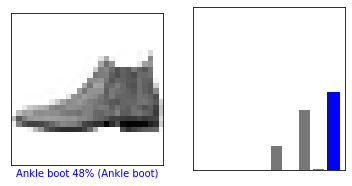

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

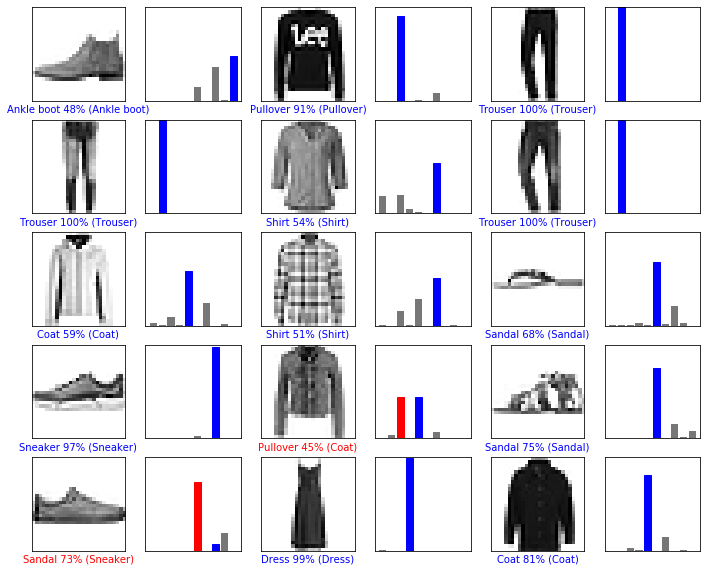

In [41]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듦

In [47]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [48]:
# 이미지 하나만 사용할 때도 배치에 추가합니다(차원 추가)
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [50]:
#이 이미지의 예측을 만듦
predictions_single = model.predict(img)

print(predictions_single)

[[2.2599882e-06 9.8201518e-08 9.7348429e-06 2.6921092e-05 1.6774837e-05
  1.4571613e-01 3.6269153e-05 3.6706933e-01 6.1922204e-03 4.8093021e-01]]


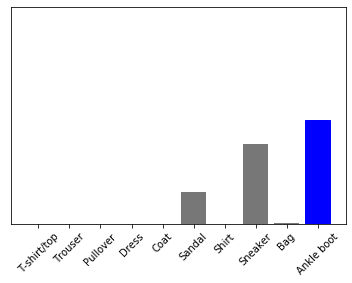

In [51]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [52]:
np.argmax(predictions_single[0])

9